# Evolution de la population scolaire et de la population totale par arrondissement entre 2019 et 2021
### Problématique : Est-ce que l'évolution de la démographie des écoles est en accord avec évolution de la population (par classe d'âge) ?

Claire du Campe de Rosamel, Benoit Nallet, Amandine Perret

## 1. Introduction



Avant de commnecer l'analyse on aura besoin des packages suivants : 

In [ ]:
!pip install unidecode
!pip install py7zr geopandas openpyxl tqdm s3fs 
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette
!pip install urllib3==1.26.5

In [12]:
import pandas as pd
import zipfile
import requests
import os
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode 
import matplotlib.ticker as mticker
import geopandas as gpd
from cartiflette import carti_download


## 2. Collecte et nettoyage des données 

L'analyse se fait à partir des plusieurs bases de données. Une première relative aux effectifs scolaires disponibles à l'url XX recensant pour toute la France le nombre d'élève par classe par école. Nous avons donc réduit l'étendue de la base de données aux seules écoles dans Paris intra-muros (dont le code postal commence par 75). Une deuxième partie des données est issue du recensement fait par l'Insee. Plusieurs bases de données ont été nécessaires : la base logement pour comptabiliser la population habitant effectivement dans chaque arrondissement, et la base XY permettant d'avoir des effectifs de population par tranche d'âge (information qu'il n'était pas possible de retrouver à partir de la base logement étant donnée la construction des variables). 

Les différentes bases de données sont importées directement depuis leur adresse internet et sont ensuite netoyées dans le script "import_data.py" que l'on importe ci-dessous. 

In [ ]:
from scripts import import_data

In [18]:
import_data.df_ages_2019.columns

Index(['NIVGEO', 'CODGEO', 'LIBGEO', 'SEXE', 'AGED100', 'NB'], dtype='object')

In [23]:
%run scripts/import_data.py

<Response [200]>
Téléchargement réussi !
<Response [200]>
Téléchargement réussi !
<Response [200]>
Téléchargement réussi !
Le fichier BTT_TD_POP1B_2019.zip existe déjà.
Fichiers extraits.


/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/import_data.py:201: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2019 = pd.read_csv('extracted_files/BTT_TD_POP1B_2019.csv', delimiter=';', encoding='latin1')


Le fichier TD_POP1B_2021.zip existe déjà.
Fichiers extraits.


/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/import_data.py:231: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2021 = pd.read_csv('extracted_files/TD_POP1B_2021.csv', delimiter=';', encoding='latin1')


Le fichier BTT_TD_POP1B_2020.zip existe déjà.
Fichiers extraits.


/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/import_data.py:257: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2020 = pd.read_csv('extracted_files/TD_POP1B_2020.csv', delimiter=';', encoding='latin1')


In [31]:
effectifs_ecoles.to_csv("temp_effectifs_ecoles.csv", index=False)

## 3. Visualisation 

L'idée est ici de montrer des graphiques et des cartes sur ce qu'on a fait. Peut être rajouter qq stats descriptives. 

In [57]:
from scripts import stats_descr_effectif

In [55]:
print(stats_descr_effectif.table_pertes_df)

     Période  Perte absolue  Part relative (%)
0  2019-2020           4014          37.996971
1  2020-2021           6550          62.003029
2  2019-2021          10564         100.000000


(np.float64(-0.5), np.float64(999.5), np.float64(599.5), np.float64(-0.5))

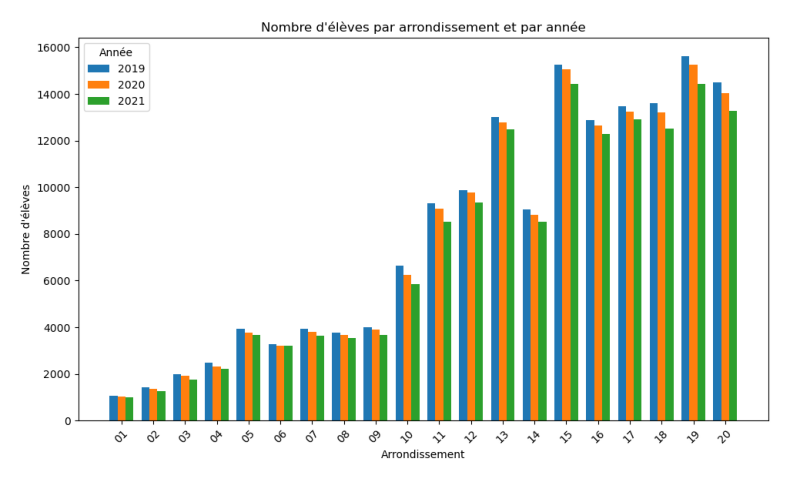

In [56]:
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/nb_élève_par_annee.png"))
plt.axis("off")

### A. L'évolution de la population à Paris par arrondissement entre 2019 et 2021
#### a. L'évolution globale 

#### b. Focus sur la pyramide des âges 

### B. L'évolution des effectifs scolaires par arrondissement entre 2019 et 2021
#### a. Au global 

#### b. La population en primaire

#### c. La population en maternelle 

## 4. Modelisation 

Ici les regressions d'Amandine 

## 5. Conclusion
